In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

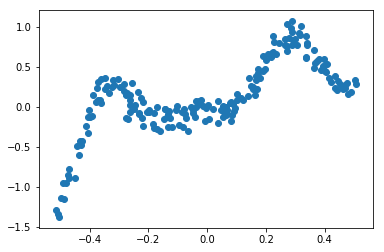

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

In [10]:
# Relu with different gradient for zero region

class PRelu(tnn.Layer):
    def __init__(self, optimizer):
        self.x = None
        self.alpha = 0.1
        self.alphaOpt = optimizer.set_parameter(self.alpha)
        self.delalpha = None
        
        tnn.layerList.append(self)

    def forward(self, x):
        self.x = x
        return np.maximum(self.alpha*x, x)

    def backward(self, output_delta):
        self.delalpha = np.where(self.x >= 0, 0, self.x)*output_delta
        self.delalpha = self.delalpha.mean()
        return np.where(self.x >= 0, 1, self.alpha)*output_delta
    
    def update(self):
        gradient = self.alphaOpt.compute_gradient(self.delalpha)
        self.alpha -= gradient

# class PRelu(tnn.Layer):
#     def __init__(self, optimizer, alpha=0.01):
#         tnn.layerList.append(self)
#         self.x = None
#         self.alpha = alpha
#         self.alphaOpt = optimizer
#         self.dalpha = None

#     def forward(self, x):
#         self.x = x
#         toret = np.maximum(self.alpha * x, x)
#         # print('toret=',toret)
#         return toret

#     def backward(self, output_delta):
#         dx = np.ones_like(self.x)
#         dx[self.x < 0] = self.alpha
        
# #         dalpha = 
#         return np.where(self.x >= 0, 1, self.alpha)*output_delta


In [11]:
optimizer = tnn.Adam()
linear = tnn.LinearLayer(1, 1, optimizer=optimizer)
prelu = PRelu(optimizer)
la1 = tnn.AutoForm()
la1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = la1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    
    dx = la1.backward(dy)
    
    la1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        print(la1.layerList[1].alpha)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.456908446291223
0.09000000083920812

_______________________
epoch 100
Loss 0.10980566855172015
-0.2899432259371544

_______________________
epoch 200
Loss 0.07296879637702905
-0.2251176399592085

_______________________
epoch 300
Loss 0.0729488893040306
-0.22311102221391912

_______________________
epoch 400
Loss 0.07294905286517162
-0.2231915935079891

_______________________
epoch 500
Loss 0.07294875766213395
-0.22327029471328536

_______________________
epoch 600
Loss 0.07294881528757555
-0.22339596338258025

_______________________
epoch 700
Loss 0.07294857884276622
-0.2234952211883705

_______________________
epoch 800
Loss 0.07294879527688194
-0.22364486001727935

_______________________
epoch 900
Loss 0.07294883421486759
-0.22382142983529327

_______________________
epoch 1000
Loss 0.07294831499497159
-0.2239341488787251

_______________________
epoch 1100
Loss 0.07294809487237724
-0.22411712981337226

_______________________
epoch 1200
Lo


_______________________
epoch 10200
Loss 0.06532980474603589
-15.657183055560981

_______________________
epoch 10300
Loss 0.06532397566920276
-15.976315854482904

_______________________
epoch 10400
Loss 0.06526086159134847
-16.291768592384432

_______________________
epoch 10500
Loss 0.06523567663211213
-16.60882439003979

_______________________
epoch 10600
Loss 0.06520736727125412
-16.926803692234692

_______________________
epoch 10700
Loss 0.0651771809536041
-17.24458172120675

_______________________
epoch 10800
Loss 0.06514717396588882
-17.56265474040013

_______________________
epoch 10900
Loss 0.06511796817643861
-17.881078351313047

_______________________
epoch 11000
Loss 0.06507608399137785
-18.194978732236795

_______________________
epoch 11100
Loss 0.06507557088444271
-18.50883121312025

_______________________
epoch 11200
Loss 0.06502377768501738
-18.82394127218018

_______________________
epoch 11300
Loss 0.06499798326556283
-19.14570942958299

______________________


_______________________
epoch 20400
Loss 0.0642278268034445
-38.23674825455497

_______________________
epoch 20500
Loss 0.06422466484022571
-38.39076424173739

_______________________
epoch 20600
Loss 0.06422148771166115
-38.54671026044885

_______________________
epoch 20700
Loss 0.0642182994839169
-38.70441564406232

_______________________
epoch 20800
Loss 0.0650525197271616
-38.542668041384694

_______________________
epoch 20900
Loss 0.06422145390171778
-38.54866097645483

_______________________
epoch 21000
Loss 0.06421898235312111
-38.67018323568884

_______________________
epoch 21100
Loss 0.06421647759958678
-38.79475324885212

_______________________
epoch 21200
Loss 0.0642139295810673
-38.92225945764584

_______________________
epoch 21300
Loss 0.06421134131960221
-39.05259726681688

_______________________
epoch 21400
Loss 0.06420871600916493
-39.18565088242765

_______________________
epoch 21500
Loss 0.06420605698575618
-39.321294426891015

_______________________
epoch


_______________________
epoch 30700
Loss 0.06408148259160473
-48.262059311506654

_______________________
epoch 30800
Loss 0.06406569358219814
-48.30998111244451

_______________________
epoch 30900
Loss 0.0640650936709205
-48.41289936613142

_______________________
epoch 31000
Loss 0.06406311694447128
-48.47310175617032

_______________________
epoch 31100
Loss 0.06406852338588637
-48.5515540541552

_______________________
epoch 31200
Loss 0.06406458310260177
-48.636477211666524

_______________________
epoch 31300
Loss 0.0643083028071531
-48.68998080363188

_______________________
epoch 31400
Loss 0.06405977512631054
-48.770653136868525

_______________________
epoch 31500
Loss 0.06406376184633067
-48.87247851226951

_______________________
epoch 31600
Loss 0.06414066785737416
-48.87529537235754

_______________________
epoch 31700
Loss 0.06405523256960216
-48.969547180799125

_______________________
epoch 31800
Loss 0.06405558808545758
-49.07047276525264

_______________________
ep

TclError: invalid command name "pyimage57"

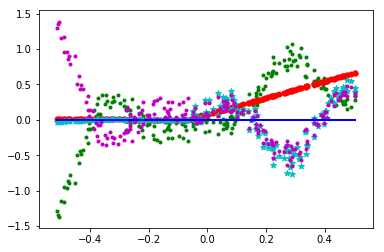

In [12]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [16]:
prelu.alpha, linear.weights

(-54.0574730855831, array([[-0.02219053]]))

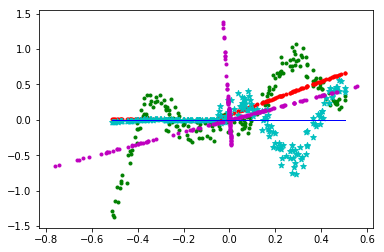

In [13]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dx and dy

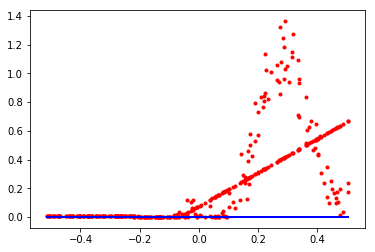

In [14]:
_a1 = la1.forward(x_data - dx)
_dy = tnn.MseLoss.del_loss(_a1, y_data)
_dx = la1.backward(_dy)

# plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, _dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
# plt.scatter(x, _dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, _a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.plot(x, np.zeros_like(x), c='b', lw=2)